<a href="https://colab.research.google.com/github/maschu09/mless/blob/main/time_series_forecasting/7_multi_model_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Check for causality

😈 **Task 3:** Run a Granger test between `temp` and `o3`. Is there any directional causality?

😈 **Question 3:** Why is Granger causality not the same as actual causality?


In [3]:
#from statsmodels.tsa.stattools import grangercausalitytests
#for col in ["no2", "temp", "no", "press"]:
#    print(f"\nTesting if {col} Granger-causes o3:")
#    grangercausalitytests(dataframe[['o3', col]], maxlag=4)

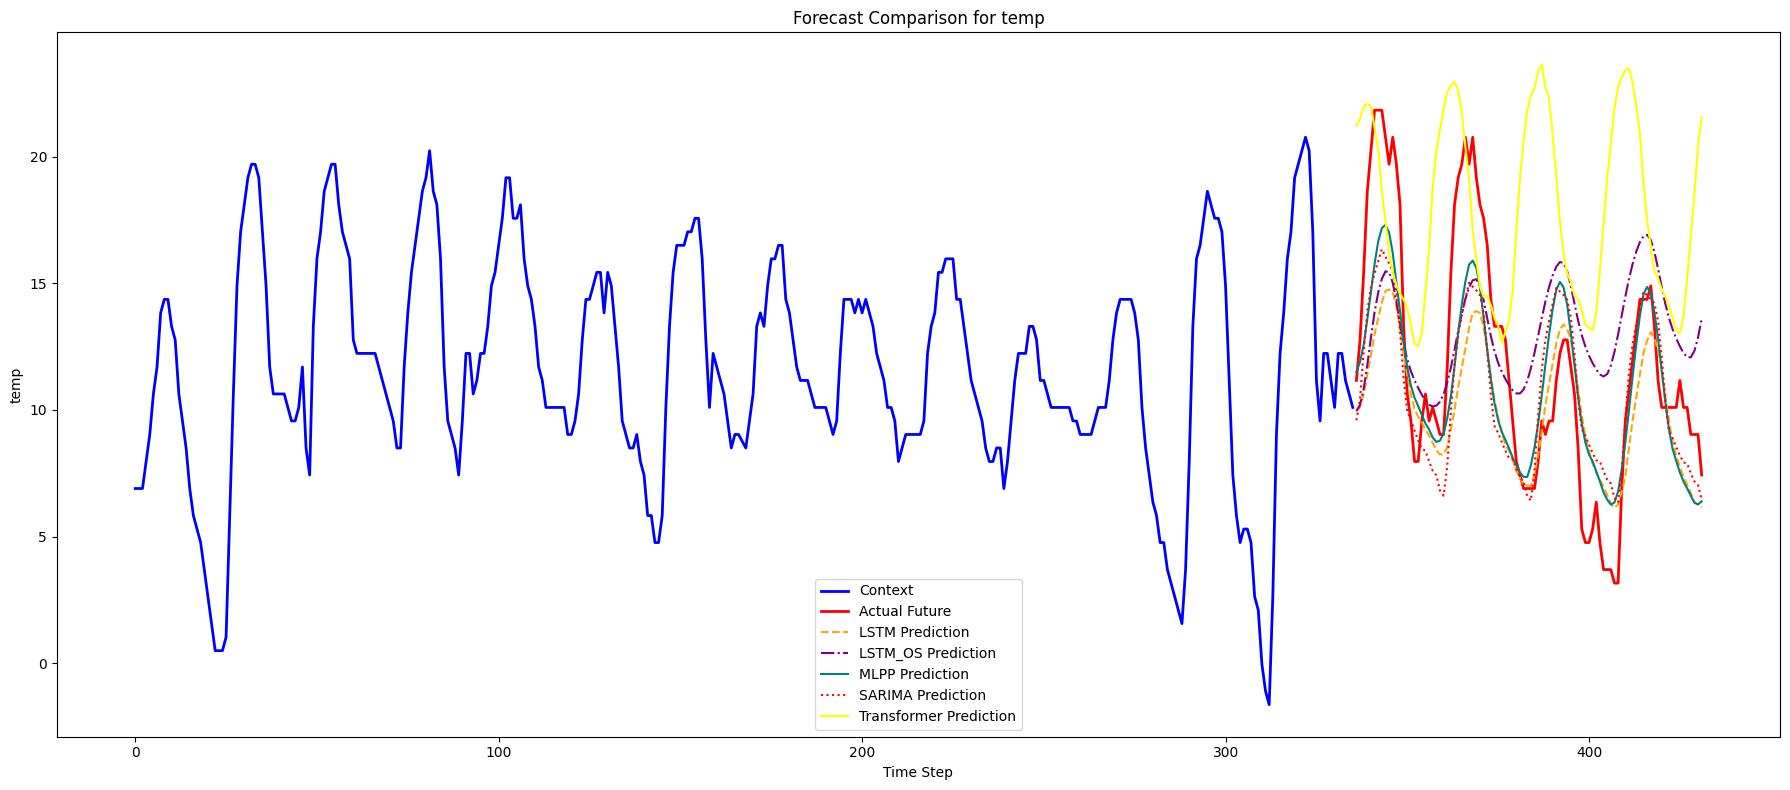

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# List your saved result files
result_files = {
    "LSTM": "lstm_results.npz",
    "LSTM_OS": "lstm_results_onestep.npz",
    "MLPP": "mlp_results.npz",
    "SARIMA": "sarima_results.npz",
    "Transformer": "PTST_results.npz"
    # Add more as needed
}

# Optional: set line styles or colors for each model
styles = {
    "LSTM": {"linestyle": "--", "color": "orange"},
    "LSTM_OS": {"linestyle": "-.", "color": "purple"},
    "SARIMA": {"linestyle": ":", "color": "red"},
    "MLPP": {"linestyle": "-", "color": "teal"},
    "Transformer": {"linestyle": "solid", "color": "yellow"}
}

# Load the first file to get context and actual future
base_model = list(result_files.keys())[0]
base_data = np.load(result_files[base_model], allow_pickle=True)
context = base_data["context"]
actual_future = base_data["actual_future"]
context_window = len(context)
prediction_horizon = len(actual_future)
variable_name = base_data["variable_column"][0]

# Start plotting
plt.figure(figsize=(18, 8))

# Plot context (with line only)
plt.plot(range(context_window), context, label="Context", color="blue", linewidth=2)

# Plot actual future (with line only)
plt.plot(
    range(context_window, context_window + prediction_horizon),
    actual_future,
    label="Actual Future",
    color="red",
    linewidth=2
)

# Loop through model files and plot their predictions
for model_name, file_path in result_files.items():
    data = np.load(file_path)
    predicted = data["predicted_future"]
    style = styles.get(model_name, {})
    plt.plot(
        range(context_window, context_window + prediction_horizon),
        predicted,
        label=f"{model_name} Prediction",
        **style,
        marker=None
    )

plt.title(f"Forecast Comparison for {variable_name}")
plt.xlabel("Time Step")
plt.ylabel(variable_name)
plt.legend()
plt.tight_layout()
plt.show()


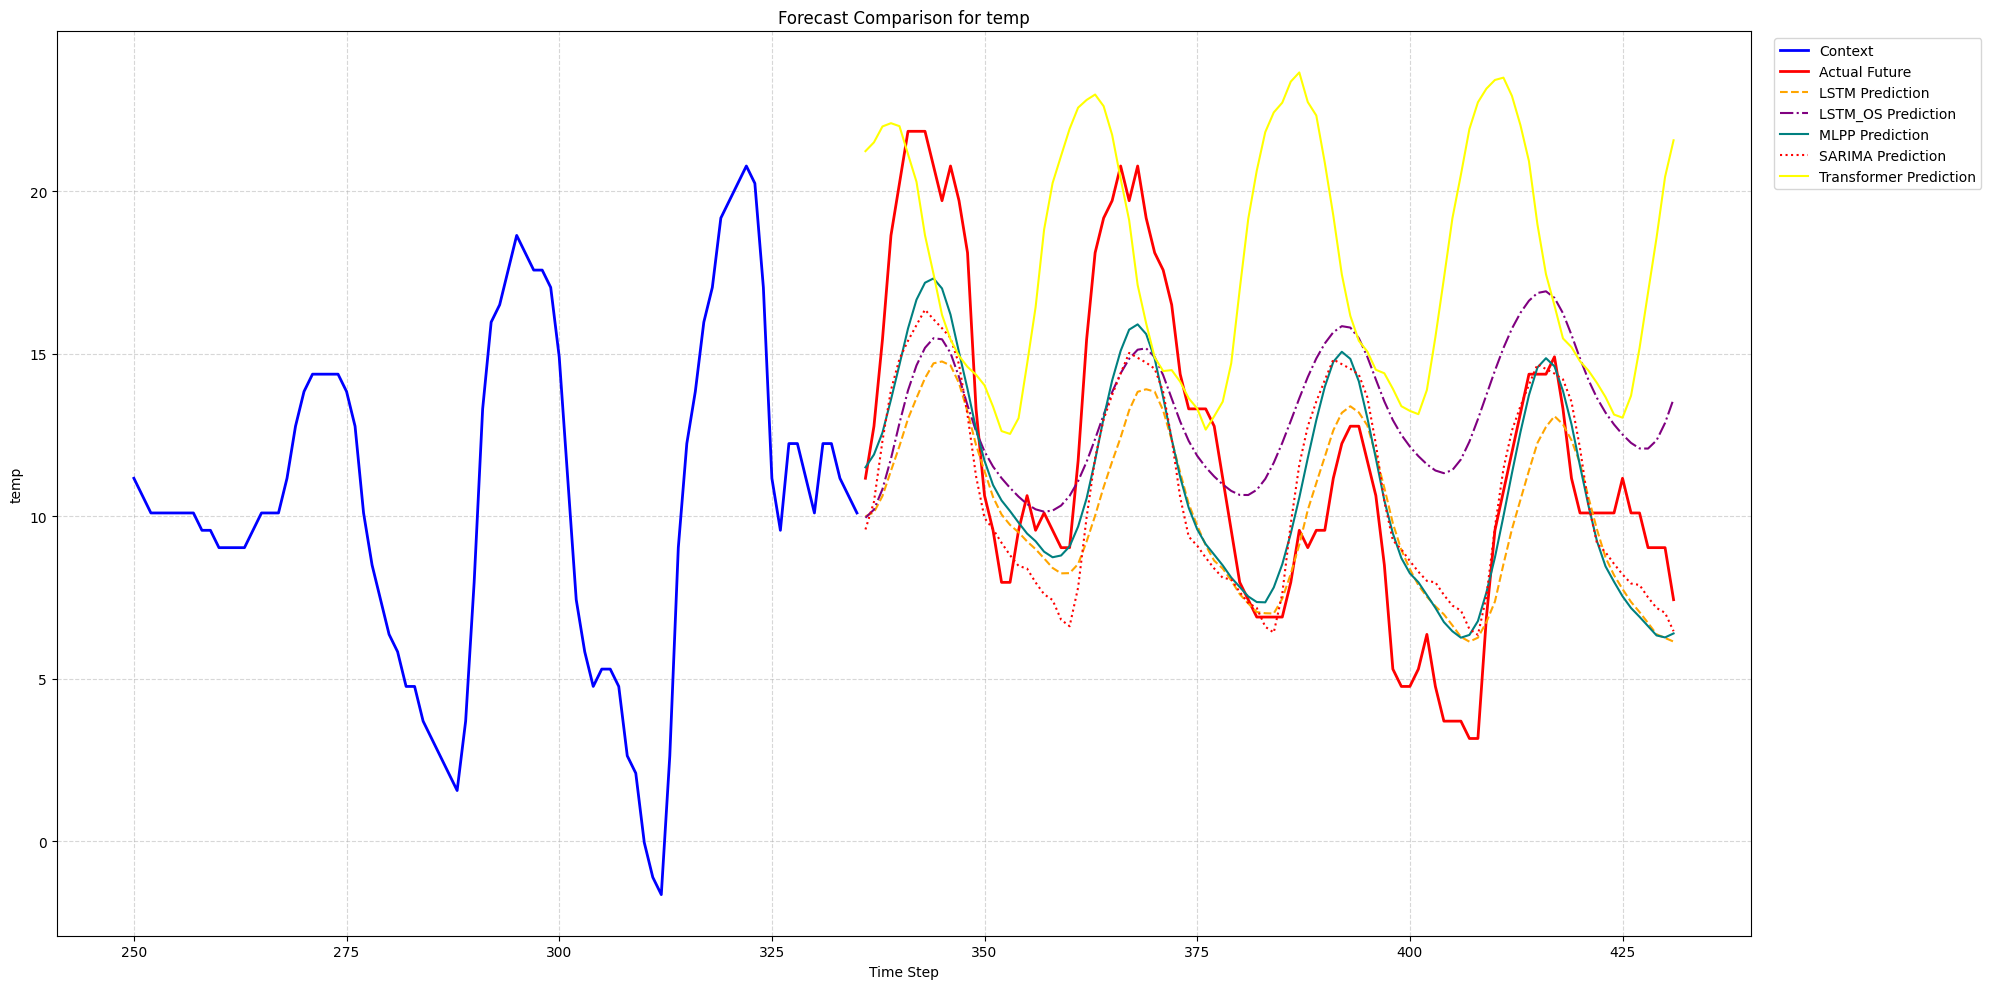

In [14]:
plt.figure(figsize=(20, 10))

context_trim_start = 250
context_trimmed = context[context_trim_start:]
context_x = range(context_trim_start, context_window)

# Plot trimmed context
plt.plot(context_x, context_trimmed, label="Context", color="blue", linewidth=2)

# Plot actual future
plt.plot(
    range(context_window, context_window + prediction_horizon),
    actual_future,
    label="Actual Future",
    color="red",
    linewidth=2
)

# Plot each model's prediction
for model_name, file_path in result_files.items():
    data = np.load(file_path, allow_pickle=True)
    predicted = data["predicted_future"]
    style = styles.get(model_name, {})
    plt.plot(
        range(context_window, context_window + prediction_horizon),
        predicted,
        label=f"{model_name} Prediction",
        **style
    )

plt.title(f"Forecast Comparison for {variable_name}")
plt.xlabel("Time Step")
plt.ylabel(variable_name)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


There are clearly differences between the different models in the future prediction, but they all quite clearly follow the same concept. Predict a trend in the data (upwards or downwards) and then add the average daily variation on top of that. As such no model is able to predict a change in trend. Which is also just an impossible task, as temp and weather are chaotic systems. So the models work quite well within their capabilities, but its simply impossible to predict future temps with any certainty using just the temp data of the past days. The difference in prediction between the models can be explained via the different loss objectives, as every model tries to minimize different statistical metrics. 

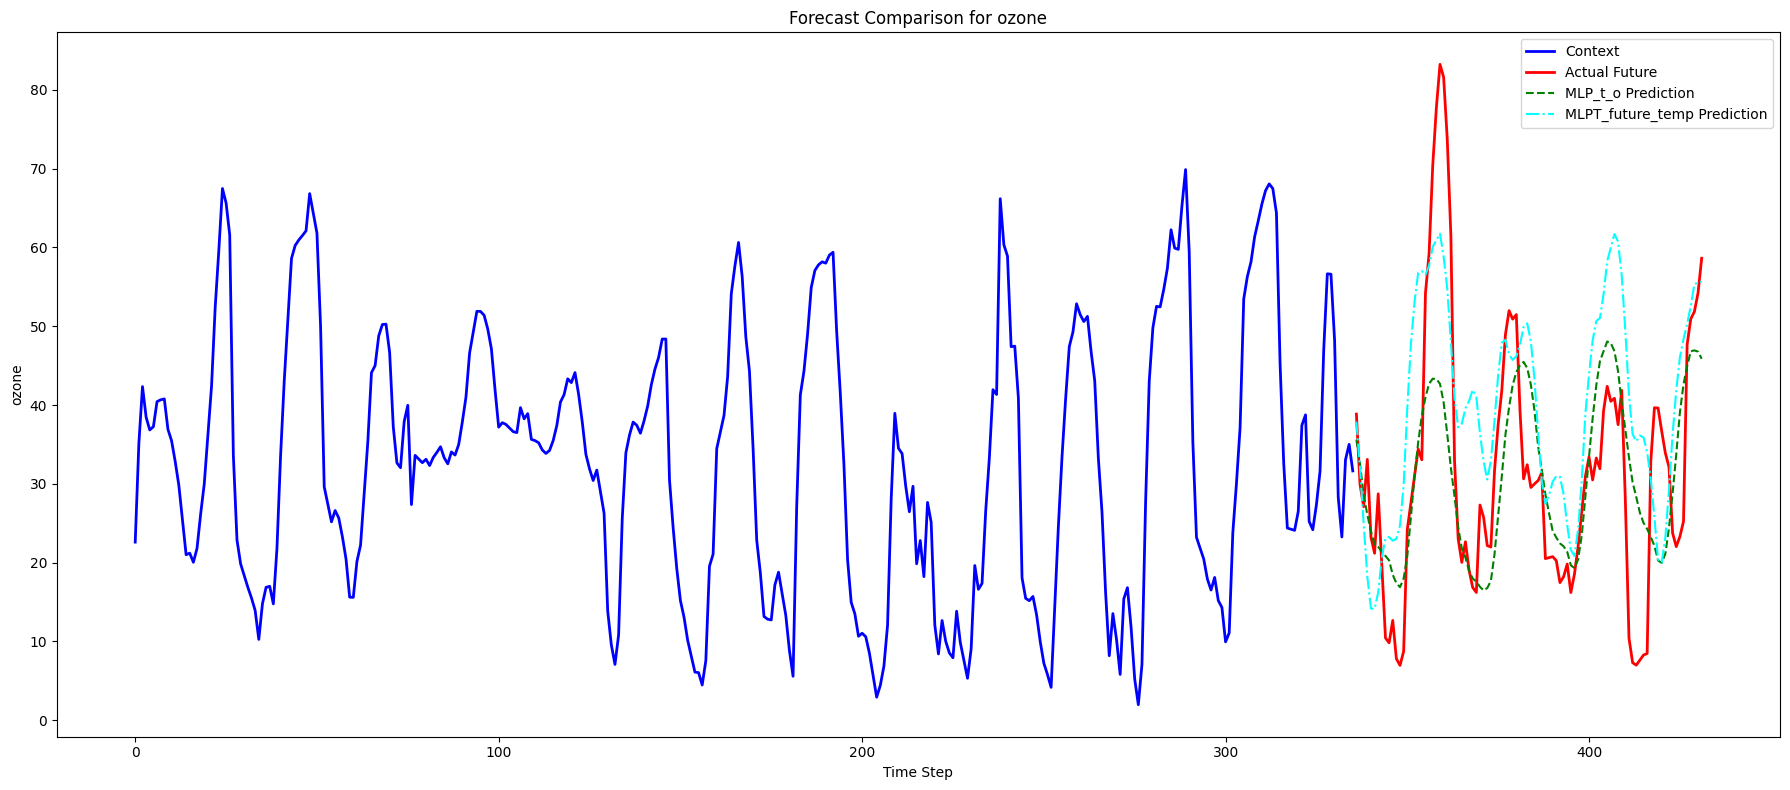

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# List your saved result files
# first one is rpediction including temp and ozone
# second one is including future temps on top of it
result_files = {
    "MLP_t_o": "mlp_results_temp_and_ozone.npz",
    "MLPT_future_temp": "mlp_results_future_temp.npz",
}

# Optional: set line styles or colors for each model
styles = {
    "MLP_t_o": {"linestyle": "--", "color": "green"},
    "MLPT_future_temp": {"linestyle": "-.", "color": "cyan"},
}

# Load the first file to get context and actual future
base_model = list(result_files.keys())[0]
base_data = np.load(result_files[base_model], allow_pickle=True)
context = base_data["context"]
actual_future = base_data["actual_future"]
context_window = len(context)
prediction_horizon = len(actual_future)
variable_name = base_data["variable_column"][0]

# Start plotting
plt.figure(figsize=(18, 8))

# Plot context (with line only)
plt.plot(range(context_window), context, label="Context", color="blue", linewidth=2)

# Plot actual future (with line only)
plt.plot(
    range(context_window, context_window + prediction_horizon),
    actual_future,
    label="Actual Future",
    color="red",
    linewidth=2
)

# Loop through model files and plot their predictions
for model_name, file_path in result_files.items():
    data = np.load(file_path)
    predicted = data["predicted_future"]
    style = styles.get(model_name, {})
    plt.plot(
        range(context_window, context_window + prediction_horizon),
        predicted,
        label=f"{model_name} Prediction",
        **style,
        marker=None
    )

plt.title(f"Forecast Comparison for ozone")
plt.xlabel("Time Step")
plt.ylabel("ozone")
plt.legend()
plt.tight_layout()
plt.show()


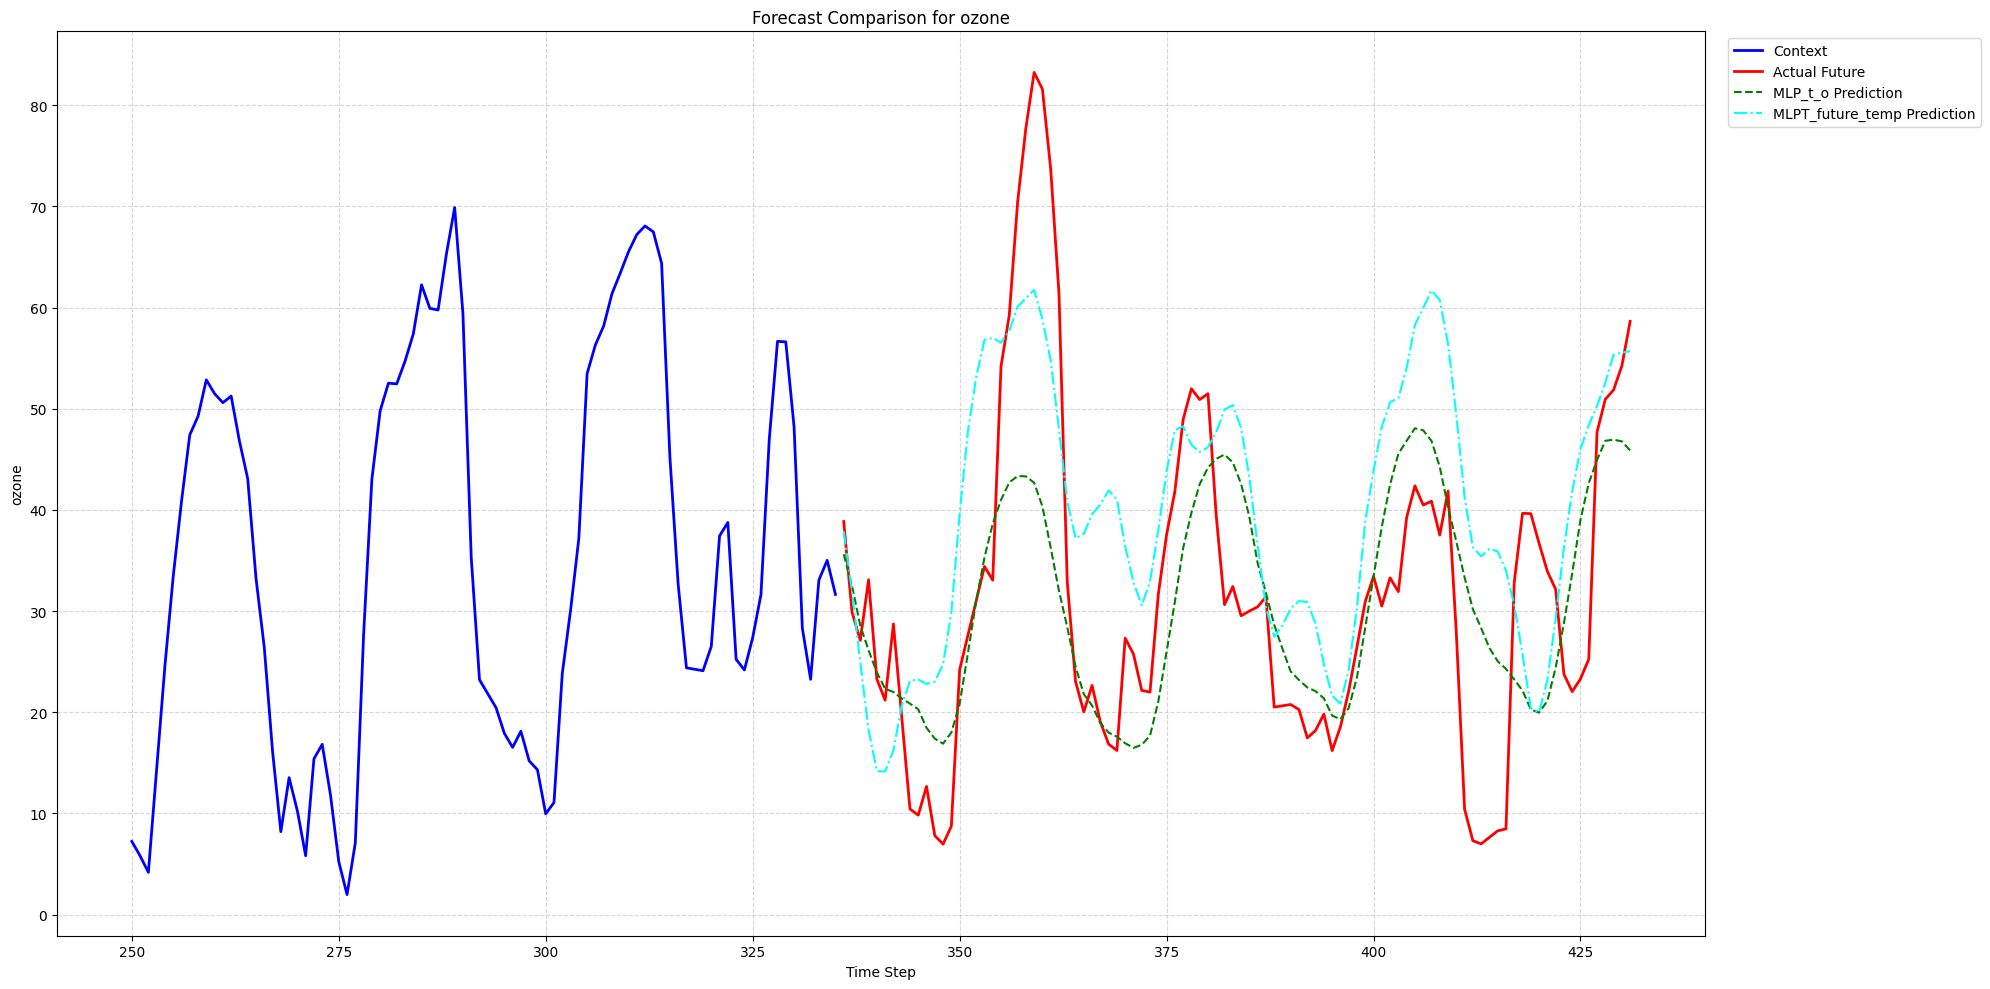

In [13]:
plt.figure(figsize=(20, 10))

context_trim_start = 250
context_trimmed = context[context_trim_start:]
context_x = range(context_trim_start, context_window)

# Plot trimmed context
plt.plot(context_x, context_trimmed, label="Context", color="blue", linewidth=2)

# Plot actual future
plt.plot(
    range(context_window, context_window + prediction_horizon),
    actual_future,
    label="Actual Future",
    color="red",
    linewidth=2
)

# Plot each model's prediction
for model_name, file_path in result_files.items():
    data = np.load(file_path, allow_pickle=True)
    predicted = data["predicted_future"]
    style = styles.get(model_name, {})
    plt.plot(
        range(context_window, context_window + prediction_horizon),
        predicted,
        label=f"{model_name} Prediction",
        **style
    )

plt.title(f"Forecast Comparison for ozone")
plt.xlabel("Time Step")
plt.ylabel("ozone")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()


predicting ozone using temp and ozone runs into the same inherent problem we faces when predicting temp using temp data, the model is able to predict a trend and a daily variation, but its not possible for the model given the data to predict any change in trend or different daily variations. 

That changes drastically when adding future temp to the data we train on, because that actually gives the model a chance to use the correlation between temp and ozone to detect a change in trend or adjust daily variations. as such the model is a lot better of predicting stronger daily outliers and making a more specific prediction. Given that there is no perfect correlation between temp and ozone the results still arent perfect of course.